# importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from drawdata import draw_scatter
from itertools import combinations_with_replacement
from sklearn.model_selection import train_test_split

# create a function to convert our linear features to polynomial features:
- by this function we can learn models with non-linear (polynomial) decision boundary.

In [2]:
def calculate_polynomial_features(X, degree):
    """
    X: numpy array
    degree: integer
    """
    n_samples, n_features = X.shape
    result = np.ones((n_samples, 1))  # Start with a column of ones for the intercept term
    
    for d in range(1, degree + 1):
        combinations = combinations_with_replacement(range(n_features), d)
        for comb in combinations:
            new_feature = np.prod(X[:, comb], axis=1).reshape(n_samples, 1)
            result = np.hstack((result, new_feature))
    
    return result

# predict function:
- this is our hypothesis function = h(x)

In [3]:
def predict(X, W, b):
    return 1/(1+np.exp(-(np.matmul(X, W) + b)))

# cost fucntion:

In [4]:
def cost_function(X, Y, W, b, lam):
    m, n = X.shape
    f_x_w_b = predict(X, W, b)
    return -1*(np.sum(Y*np.log(f_x_w_b) + (1-Y)*np.log(1-f_x_w_b))/m) + lam*(np.dot(W, W)/(2*m))

# gradient:
- calculating gradient of waits and bias of model

In [5]:
def gradient(X, Y, W, b, lam):
    m, n = X.shape
    f_x_w_b = predict(X, W, b)
    w_gradient = (np.matmul(f_x_w_b - Y, X) + lam*W)/m
    b_gradient = np.sum(f_x_w_b - Y)/m
    return w_gradient, b_gradient

# gradient descent:

In [6]:
def gradient_descent(W, b, w_gradient, b_gradient, alpha):
    return W - alpha*w_gradient, b - alpha*b_gradient

# creating dummy dataset:
- creating dummy dataset to evaluate our model

In [7]:
# draw_scatter()

# importing data set

In [8]:
data = pd.read_csv('data.csv')

In [9]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# data cleaning:
- removing outliers

In [10]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

Y.drop(X[X.iloc[:, 1] < 25].index, inplace=True)
X.drop(X[X.iloc[:, 1] < 25].index, inplace=True)

Y.drop(X[X.iloc[:, 2] < 20].index, inplace=True)
X.drop(X[X.iloc[:, 2] < 20].index, inplace=True)

Y.drop(X[X.iloc[:, 3] > 80].index, inplace=True)
X.drop(X[X.iloc[:, 3] > 80].index, inplace=True)

Y.drop(X[X.iloc[:, 4] > 600].index, inplace=True)
X.drop(X[X.iloc[:, 4] > 600].index, inplace=True)

Y.drop(X[X.iloc[:, 5] > 55].index, inplace=True)
X.drop(X[X.iloc[:, 5] > 55].index, inplace=True)
Y.drop(X[X.iloc[:, 5] < 10].index, inplace=True)
X.drop(X[X.iloc[:, 5] < 10].index, inplace=True)

Y.drop(X[X.iloc[:, 6] > 1.75].index, inplace=True)
X.drop(X[X.iloc[:, 6] > 1.75].index, inplace=True)

Y.drop(X[X.iloc[:, 7] > 70].index, inplace=True)
X.drop(X[X.iloc[:, 7] > 70].index, inplace=True)



# feature scaling:

In [11]:
feature_mean = X.mean()
feature_std = X.std()
X = (X - feature_mean) / feature_std

# splite data to train and test:
- we create our poly features, then we splite our data into train and test

In [12]:
degree = 2
poly_features = calculate_polynomial_features(X.to_numpy(), degree)
# mean, std_deviation = 0, 0.1
# W, b = random_normal = np.random.normal(mean, std_deviation, poly_features.shape[1]), 1
X_train, X_test, Y_train, Y_test = train_test_split(poly_features, Y, test_size=0.20, random_state=42)

# defining hyper parameters:

In [13]:
lam, alpha = 1, 0.1
W, b = np.ones(poly_features.shape[1]), 1

# train our model:
- update waits and bias

In [14]:
cost = []
for i in range(5000):
    w_gradient, b_gradient = gradient(X_train, Y_train.to_numpy(), W, b, lam)
    W, b = gradient_descent(W, b, w_gradient, b_gradient, alpha)
    cost.append(cost_function(X_train, Y_train.to_numpy(), W, b, lam))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21120\2700598311.py:4: RuntimeWarning: divide by zero encountered in log
  return -1*(np.sum(Y*np.log(f_x_w_b) + (1-Y)*np.log(1-f_x_w_b))/m) + lam*(np.dot(W, W)/(2*m))
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_21120\2700598311.py:4: RuntimeWarning: invalid value encountered in multiply
  return -1*(np.sum(Y*np.log(f_x_w_b) + (1-Y)*np.log(1-f_x_w_b))/m) + lam*(np.dot(W, W)/(2*m))


# evaluating learning curve:

nan 0.42588082792787124


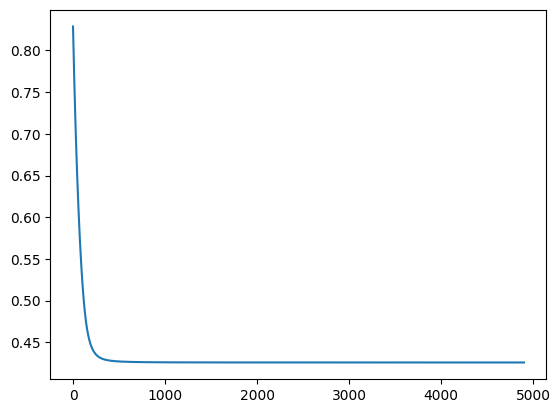

In [15]:
plt.plot(cost[100:])
print(cost[0], cost[-1])

# evaluating the model:

In [16]:
predict_test = predict(X_test, W, b)
(np.sum(((predict_test > 0.5) + 0) == Y_test.to_numpy()) / Y_test.shape[0]) * 100

79.72027972027972

In [17]:
predict_train = predict(X_train, W, b)
(np.sum(((predict_train > 0.5) + 0) == Y_train.to_numpy()) / Y_train.shape[0]) * 100

79.43760984182776

# user interface:

In [28]:
x = []
x.append(float(input('enter pregnancies: ')))
x.append(float(input('enter glucose: ')))
x.append(float(input('enter blood pressure: ')))
x.append(float(input('enter skin thickness: ')))
x.append(float(input('enter insulin: ')))
x.append(float(input('enter BMI: ')))
x.append(float(input('enter diabetes pedigree function: ')))
x.append(float(input('enter age: ')))

x = (x - feature_mean) / feature_std

x = np.array([x])

poly_x = calculate_polynomial_features(x, degree)

prediction = round(predict(poly_x, W, b)[0] * 100, 2)

if prediction >= 50:
    print(f'your diabetes by {prediction}% chance is positive.')
else:
    print(f'your diabetes by {100 - prediction} chance is negative.')

enter pregnancies:  3
enter glucose:  78
enter blood pressure:  50
enter skin thickness:  32
enter insulin:  88
enter BMI:  31
enter diabetes pedigree function:  0.3
enter age:  26


your diabetes by 96.63 chance is negative.
